In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dat=np.loadtxt('data/length_with_time_01_DangAnhVu.csv', delimiter=',', skiprows=1)
time_arrive=dat[:,0]
packet_length=dat[:,1]
data_size = time_arrive.shape[0]
print('Data Size:', data_size)

Data Size: 30438


In [3]:
A = time_arrive
L = packet_length # Packet length
C = 40000000 # Link capacity
S = L*8/C
D = np.ndarray(shape=(data_size,), dtype=float, order='F') # Depature time
T = np.ndarray(shape=(data_size,), dtype=float, order='F') # Delay Time
D[0] = A[0] + S[0]
T[0] = S[0] #D[0] - A[0]
curr_D_max = D[0];
for i in range(1, data_size):
    D[i] = max(curr_D_max, A[i]) + S[i]
    T[i] = D[i] - A[i]
    curr_D_max = max(curr_D_max, D[i])
print("Departure time:", D)
print("Delay time:", T)

Departure time: [1.18644020e-02 1.30756020e-02 4.23361080e-02 ... 8.66243318e+01
 8.66255430e+01 8.66267542e+01]
Delay time: [0.0012112  0.00238699 0.0012112  ... 0.00481609 0.00487853 0.0060768 ]


In [4]:
last_departure_time = D[-1]
col_count = int(last_departure_time*10+4)
print(col_count)
delay_packet_count = np.ndarray(shape=(col_count,), dtype=int, order='F')
delay_packet_count.fill(0)
for i in range(0, data_size):
    A_in = int(A[i]*10)
    D_in = int(D[i]*10)
    delay_packet_count[A_in] += 1
    if(D_in > A_in): delay_packet_count[D_in] += 1
print(delay_packet_count)

870
[ 31  32  46  47   9  18  19  27  34  25  26  20  29  27  37  32  23  51
  36  27  20  23  23  20  27  33  32  23  37  35  25  26   6  17   3   1
   2   1   1   2   1   1  25  14   0   0   1   2   1  23  13  13  15  21
  30  23  22  28  31  32  26  15  34  50  33  29  38  32  42  64  53  32
  17  20  32  30  23  11  11  14  11  19  15  21  25  17  19  18  23  33
  21  23  22  41  33   4  19  24  17  16  20  18  24  41  25  28  36  34
  27  31  33  31  10  24  25   8   7  11  14   9  10   5  10  15  21  13
  14  15  20  32  22  20  32  39  24  27  35  46  41  33  34  32  46  47
  46  34  37  49  62  54  43  41  64  59  49  64  59  66  72  72  83  73
  80  89  74  28  50  88  96  81  78  83  95  82  80  81  65  95 102  92
  75 102  98 103 103 103 102  28  49  73  62  48  56  58  75  59  66  70
  88  84  81  69  59  56  64  72  83  86  82  71  48  36  32  37  40  58
  50  39  28  52  66  55  42  28  67  58  61  60  49  48  53  71  79  69
  73  72  63  57  58  73  81  83  84  76  87  7

Text(0, 0.5, 'Delay Packet Count')

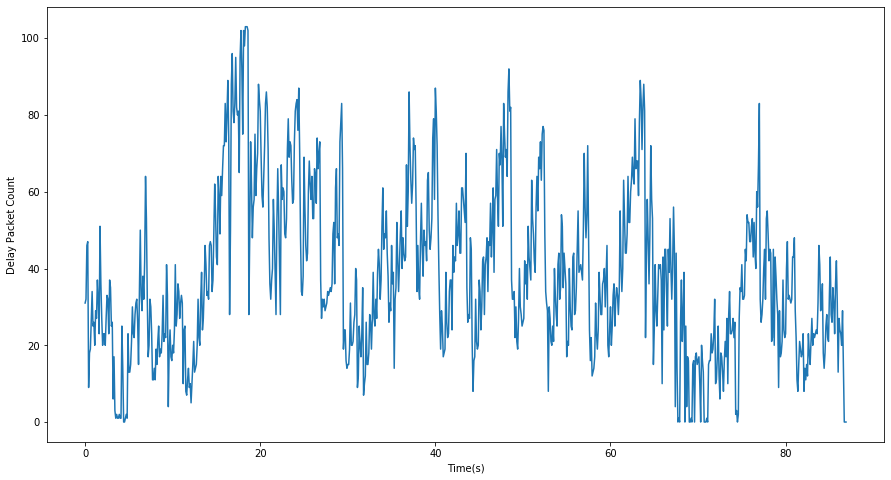

In [5]:
t = np.arange(0, col_count/10,0.1)
plt.figure(figsize=(15,8))
plt.plot(t, delay_packet_count)
plt.xlabel("Time(s)")
plt.ylabel("Delay Packet Count")